In [1]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
from utils import AuxAgg


In [2]:
data = {}

In [3]:
auxagg = AuxAgg()
auxagg.load("./saves/train_evaluate_seed_0/","evaluate_auxagg.pkl")

print(auxagg.min_mean(["valid_loss"]))
print(auxagg.max_mean(["valid_acc"]))

data["baseline"] = auxagg.max_mean(["valid_acc"])[0][1]

[(6, Array(0.20676821, dtype=float32))]
[(6, Array(0.91010696, dtype=float32))]


In [4]:
auxagg = AuxAgg()
auxagg.load("./saves/train_lewis_seed_432834_1023/","evaluate_auxagg.pkl")

print(auxagg.min_mean(["valid_loss"]))
print(auxagg.max_mean(["valid_acc"]))

data["lewis_1023"] = auxagg.max_mean(["valid_acc"])[0][1]

[(225, Array(0.34217867, dtype=float32))]
[(222, Array(0.8516615, dtype=float32))]


In [5]:
auxagg = AuxAgg()
auxagg.load("./saves/train_lewis_seed_432834_1/","evaluate_auxagg.pkl")

print(auxagg.min_mean(["valid_loss"]))
print(auxagg.max_mean(["valid_acc"]))

data["lewis_1"] = auxagg.max_mean(["valid_acc"])[0][1]

[(121, Array(0.35517004, dtype=float32))]
[(124, Array(0.84672844, dtype=float32))]


In [6]:
auxagg = AuxAgg()
auxagg.load("./saves/train_predict_transforms_seed_0/","evaluate_auxagg.pkl")

print(auxagg.min_mean(["valid_loss"]))
print(auxagg.max_mean(["valid_acc"]))

data["predict_rotations"] = auxagg.max_mean(["valid_acc"])[0][1]

[(78, Array(0.3548191, dtype=float32))]
[(86, Array(0.8471149, dtype=float32))]


In [7]:
auxagg = AuxAgg()
auxagg.load("./saves/train_autoencoder_seed_0/","evaluate_auxagg.pkl")

print(auxagg.min_mean(["valid_loss"]))
print(auxagg.max_mean(["valid_acc"]))

data["autoencoder"] = auxagg.max_mean(["valid_acc"])[0][1]

[(7, Array(0.25828585, dtype=float32))]
[(9, Array(0.88829935, dtype=float32))]


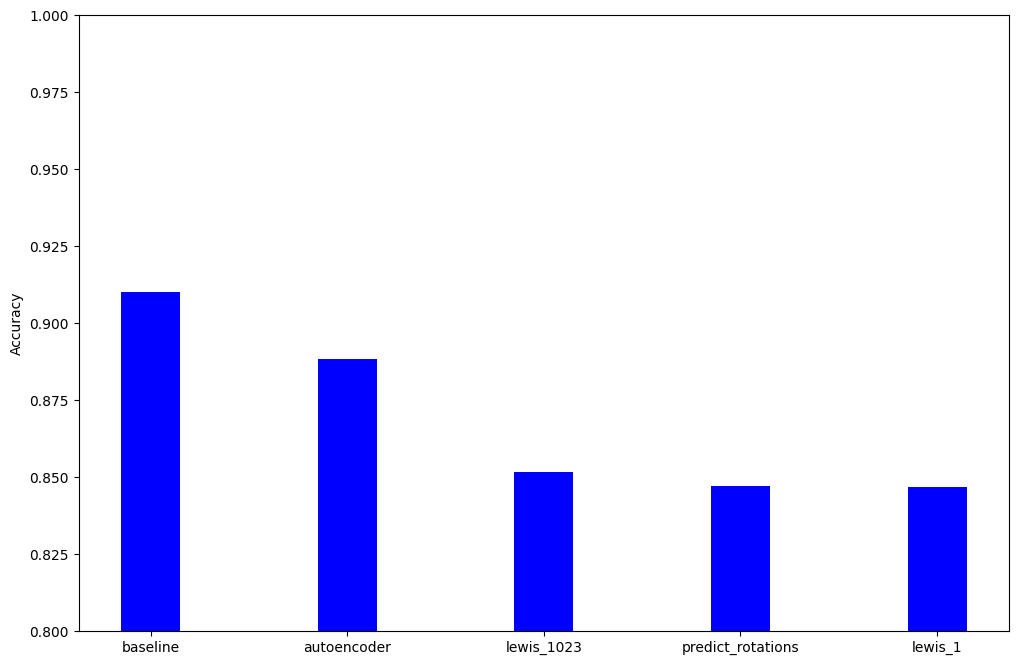

In [8]:

import numpy as np
import matplotlib.pyplot as plt 

data = dict(sorted(data.items(), key=lambda item: item[1]).__reversed__())

fig = plt.figure(figsize = (12, 8))
plt.bar(list(data.keys()), list(data.values()), color ='blue', 
        width = 0.3)

#plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
ax = plt.gca()
ax.set_ylim([0.8, 1.0])
plt.savefig("./accuracy_plot.png")